

output-1-node-200M.csv
Duration: 504.92216324806213 s
Total records 2000.0 M
3.9610065581879086 M records/s
output-1-node-200M.png


output-4-nodes-200M-rows-32-reducers.csv
Duration: 360.1412079334259 s
Total records 2000.0 M
5.5533772751984305 M records/s
output-4-nodes-200M-rows-32-reducers.png


output-4-nodes-400M-rows-128-reducers.csv
Duration: 798.9854726791382 s
Total records 4000.0 M
5.00634884710394 M records/s
output-4-nodes-400M-rows-128-reducers.png


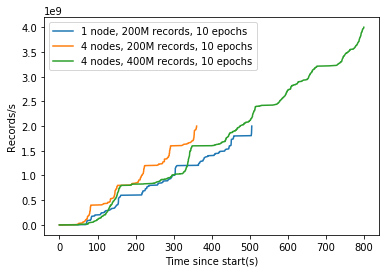

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

output = 'output-1-node-200M.csv'
def plot(output, label=None, save_ext=None):
    print('\n')
    print(output)
    events = []
    min_timestamp = float('inf')
    max_timestamp = 0
    total_records = 0
    with open(output, 'r') as f:
        for line in f.readlines():
            idx, timestamp, records = line.split(',')
            timestamp, records = float(timestamp), int(records)
            events.append((timestamp, records))
            if timestamp < min_timestamp:
                min_timestamp = timestamp
            if timestamp > max_timestamp:
                max_timestamp = timestamp
            total_records += records
    print("Duration:", max_timestamp - min_timestamp, "s")
    print("Total records", total_records / 1e6, "M")
    print(total_records / 1e6 / (max_timestamp - min_timestamp), "M records/s")

    events.sort(key=lambda elm: elm[0])
    timestamps = [t - min_timestamp for t, r in events]
    records = [r for t, r in events]
    records = np.cumsum(records)

    plt.xlabel("Time since start(s)")
    plt.ylabel("Records/s")
    plt.plot(timestamps, records, label=label)
    plt.legend()
    if save_ext:
        filename = output.split('.')[0] + '.' + save_ext
        print(filename)
        plt.savefig(filename)

plot('output-1-node-200M.csv', label="1 node, 200M records, 10 epochs", save_ext='png')
plot('output-4-nodes-200M-rows-32-reducers.csv', label='4 nodes, 200M records, 10 epochs', save_ext='png')
plot('output-4-nodes-400M-rows-128-reducers.csv', label='4 nodes, 400M records, 10 epochs', save_ext='png')